# Visualising Dataset

In [2]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## Spiral (Healthy)

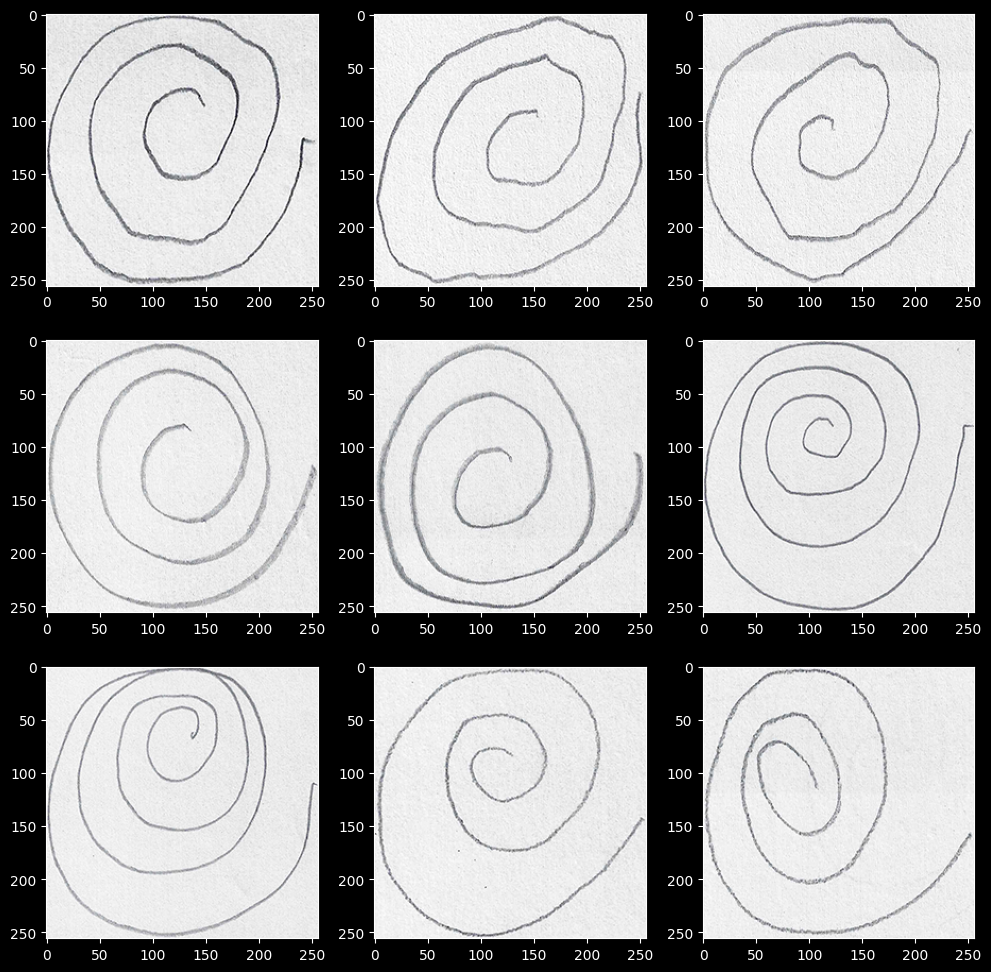

In [3]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("parkinsons_images/drawings/spiral/training/healthy/"+ os.listdir("parkinsons_images/drawings/spiral/training/healthy")[i])
    plt.imshow(img)   
plt.show() 

## Spiral (Parkinson)

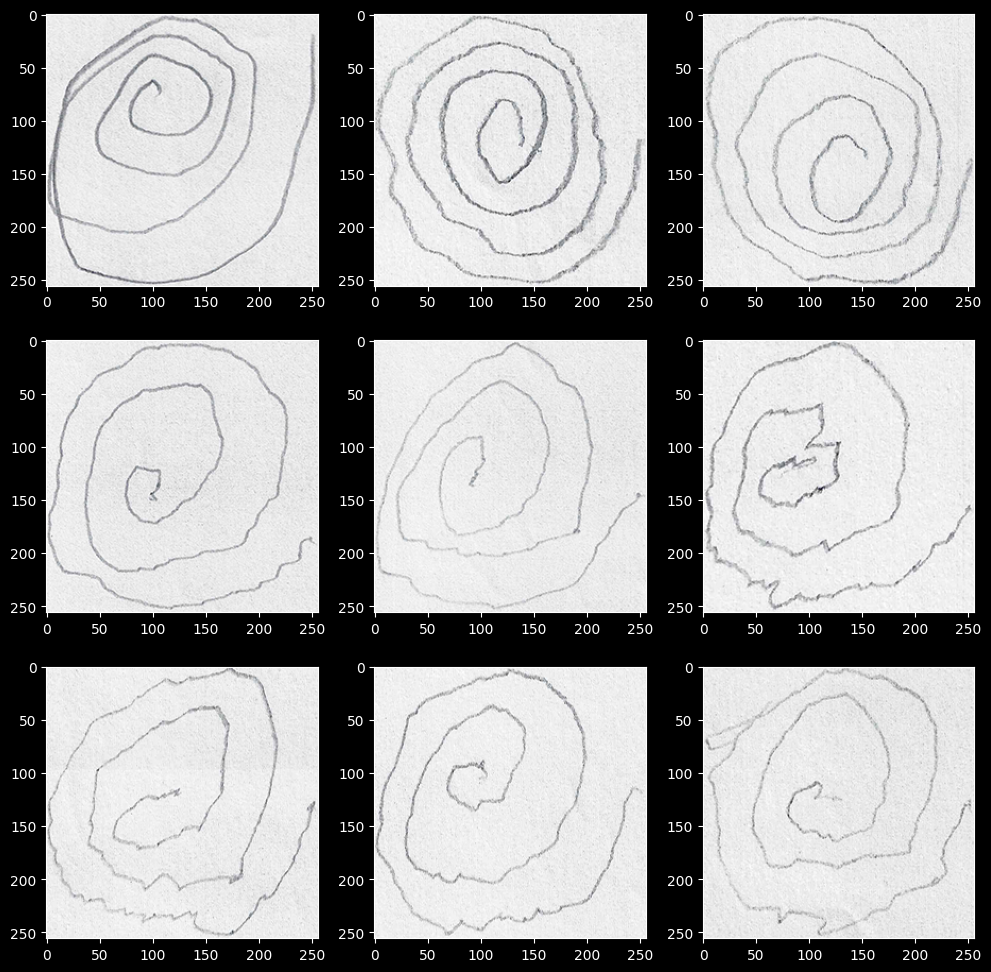

In [4]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("parkinsons_images/drawings/spiral/training/parkinson/"+
                  os.listdir("parkinsons_images/drawings/spiral/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

# # Wave (Healthy)

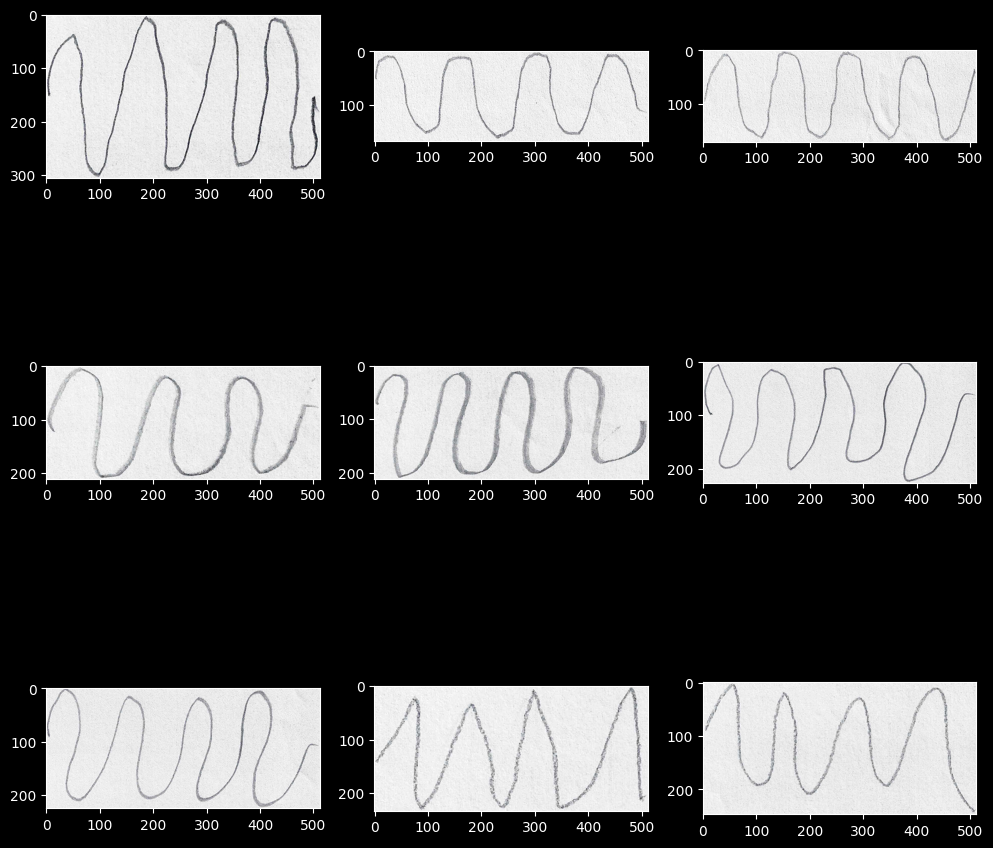

In [5]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("parkinsons_images/drawings/wave/training/healthy/"+
                  os.listdir("parkinsons_images/drawings/wave/training/healthy")[i])
    plt.imshow(img)   
plt.show()

# # Wave (Parkinson)

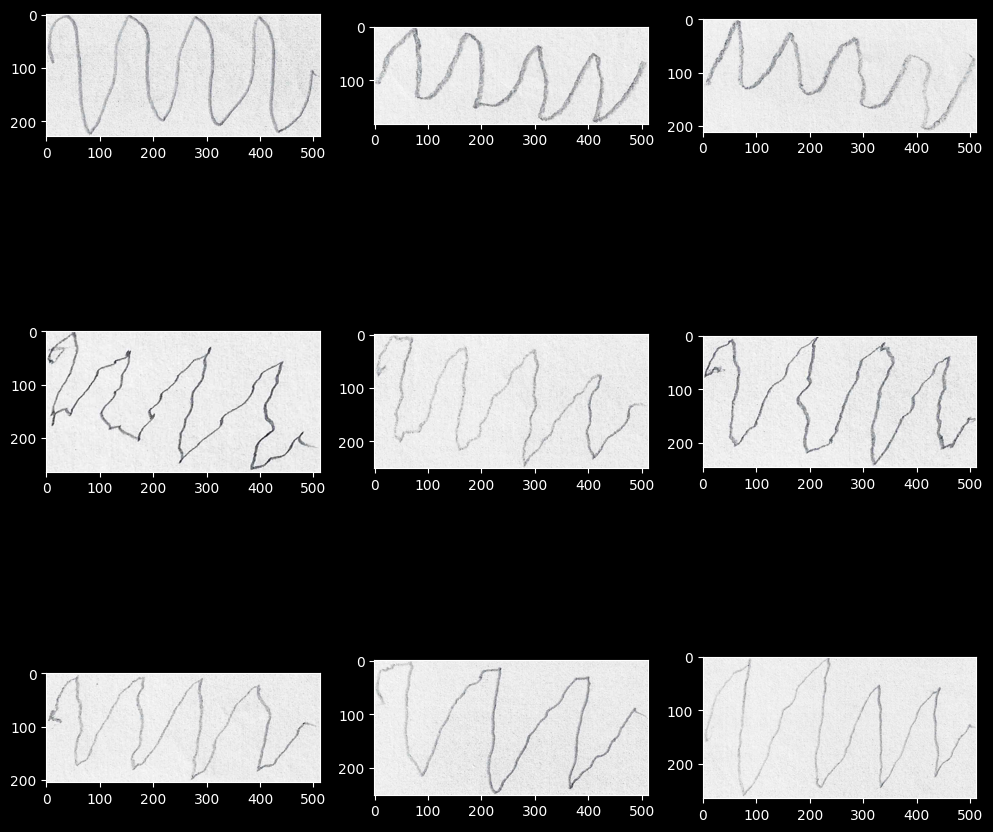

In [6]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("parkinsons_images/drawings/wave/training/parkinson/"+
                  os.listdir("parkinsons_images/drawings/wave/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

# Importing CNN Layers

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout

# Building Classifier

In [8]:
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape=(128, 128, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.3))  # Add dropout

classifier.add(Conv2D(32, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.3))  # Add dropout

classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.4))  # Add dropout
classifier.add(Dense(units=1, activation='sigmoid'))


c:\Program Files\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Image Data Generation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
spiral_train_generator = train_datagen.flow_from_directory('parkinsons_images/drawings/spiral/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory('parkinsons_images/drawings/spiral/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [12]:
wave_train_generator = train_datagen.flow_from_directory('parkinsons_images/drawings/wave/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory('parkinsons_images/drawings/wave/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


# Fitting The Model with Data

In [13]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001
)

early_stopping = EarlyStopping(
    monitor='val_loss', patience=6, verbose=1, restore_best_weights=True
)

callbacks_list = [reduce_learningrate, early_stopping]  # Use both

classifier.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)
from collections import Counter
import numpy as np

counter = Counter(spiral_train_generator.classes)
total_samples = sum(counter.values())

class_weights = {
    0: total_samples / counter[0],  # Weight for class 0 (Healthy)
    1: total_samples / counter[1]   # Weight for class 1 (Parkinson's)
}
print("Class Weights:", class_weights)
from keras.layers import Dropout




Class Weights: {0: 2.0, 1: 2.0}


In [14]:
history = classifier.fit(
    spiral_train_generator,
    steps_per_epoch=spiral_train_generator.n // spiral_train_generator.batch_size,
    epochs=48,
    validation_data=spiral_test_generator,
    validation_steps=spiral_test_generator.n // spiral_test_generator.batch_size,
    class_weight=class_weights,  # Add this line
    callbacks=callbacks_list
)


c:\Program Files\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 606ms/step - accuracy: 0.4833 - loss: 6.2200 - val_accuracy: 0.5000 - val_loss: 1.2653 - learning_rate: 0.0010
Epoch 2/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5000 - loss: 5.4177 - val_accuracy: 0.5000 - val_loss: 0.7248 - learning_rate: 0.0010
Epoch 3/48


c:\Program Files\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.5542 - loss: 2.2374 - val_accuracy: 0.5000 - val_loss: 0.7720 - learning_rate: 0.0010
Epoch 4/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5000 - loss: 3.0196 - val_accuracy: 0.5000 - val_loss: 0.7073 - learning_rate: 0.0010
Epoch 5/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5646 - loss: 1.5926 - val_accuracy: 0.5000 - val_loss: 0.6953 - learning_rate: 0.0010
Epoch 6/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4062 - loss: 1.4628 - val_accuracy: 0.5000 - val_loss: 0.6963 - learning_rate: 0.0010
Epoch 7/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.4688 - loss: 1.5924 - val_accuracy: 0.5000 - val_loss: 0.6951 - learning_rate: 0.0010
Epoch 8/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2500 - loss: 1.7473 - val_accuracy: 0.5000 - val_loss: 0.6937 - learning_rate: 0.0010
Epoch 9/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.4729 - loss: 1.4542 - val_accuracy: 0.5000 - val_

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze pretrained layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Plotting Accuracy and Loss

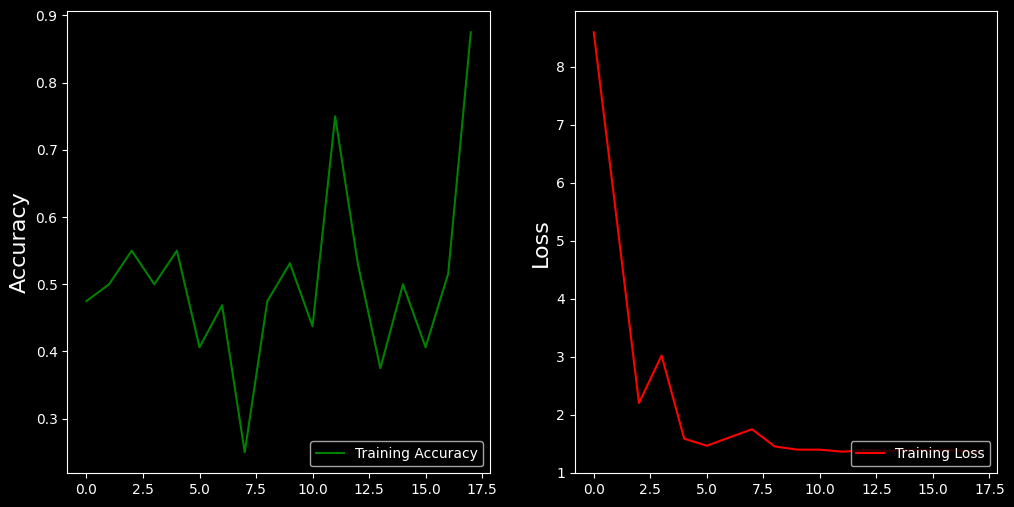

In [16]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()


In [17]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# Evaluate the model on the test set
loss, accuracy = classifier.evaluate(spiral_test_generator)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Get true labels
true_labels = spiral_test_generator.classes

# Predict labels
pred_probs = classifier.predict(spiral_test_generator)
pred_labels = np.round(pred_probs).flatten()  # Convert probabilities to binary labels

# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=['Healthy', 'Parkinson\'s']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.4667 - loss: 0.6931

Test Accuracy: 46.67%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        15
 Parkinson's       0.48      0.93      0.64        15

    accuracy                           0.47        30
   macro avg       0.24      0.47      0.32        30
weighted avg       0.24      0.47      0.32        30



In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescale for testing (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Training and Testing Data
train_generator = train_datagen.flow_from_directory(
    'parkinsons_images/drawings/spiral/training',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'parkinsons_images/drawings/spiral/testing',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)
# Load Pretrained MobileNetV2 (without top layers)
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze pretrained layers

# Build the Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Define Callbacks
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, verbose=1, restore_best_weights=True)

callbacks_list = [reduce_learningrate, early_stopping]

# Train the Model
history = model.fit(
    train_generator,
    epochs=20,  # Adjust as needed
    validation_data=test_generator,
    callbacks=callbacks_list
)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


c:\Program Files\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 869ms/step - accuracy: 0.5736 - loss: 0.7275 - val_accuracy: 0.7667 - val_loss: 0.5071 - learning_rate: 0.0010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.6250 - loss: 0.5415 - val_accuracy: 0.7333 - val_loss: 0.4868 - learning_rate: 0.0010
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.7002 - loss: 0.5199 - val_accuracy: 0.7667 - val_loss: 0.4579 - learning_rate: 0.0010
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.8540 - loss: 0.3488 - val_accuracy: 0.7333 - val_loss: 0.4403 - learning_rate: 0.0010
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.8269 - loss: 0.3308 - val_accuracy: 0.8000 - val_loss: 0.4405 - learning_rate: 0.0010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.8255 - loss: 0.3020 - val_accuracy: 0.7000 - val_loss: 0.5166 - learning_rate: 0.0010
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7956 - loss: 0.3320 
Epoch 7: ReduceL

In [ ]:
# Create the 'models' directory if it doesn't exist
import os
if not os.path.exists("models"):
    os.makedirs("models")

# Save the trained model
model.save("models/parkinsons.h5")

print("Model saved successfully as models/parkinsons.h5")


Model saved successfully as models/parkinsons.h5
